# 01 - EDA & Cleaning

**Đề tài:** Phân tích và trực quan hóa dữ liệu tuyển dụng CNTT ở Việt Nam

## Mục tiêu:
- Khảo sát dữ liệu thô `Data_Jobs.csv`
- Làm sạch và chuẩn hóa dữ liệu
- **Lọc dữ liệu theo phạm vi:** Chỉ giữ lại dữ liệu việc làm tại Việt Nam (HANOI, HCMC, VIETNAM, REMOTE)
- Loại bỏ dữ liệu không phù hợp (PHILIPPINES, UNKNOWN)
- Ghi lại các quyết định xử lý và ảnh hưởng
- Xuất `Data_Jobs_Clean.csv` để dùng cho phân tích tiếp theo

## Phạm vi nghiên cứu:
- **Thị trường:** Việt Nam
- **Ngành:** CNTT (Data Science, Data Engineering, Data Analysis, Business Intelligence)
- **Địa điểm:** Hà Nội, TP.HCM, Việt Nam, Remote


In [12]:
# khảo sát dữ liệu việc làm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_columns', None) # Hiển thị tất cả các cột
sns.set_theme(style="whitegrid") # Thiết lập giao diện seaborn
 
RAW_PATH = r"D:\Truc_quan\Data_Jobs.csv"
CLEAN_PATH = r"D:\Truc_quan\Data_Jobs_Clean.csv"

# Kiểm tra file tồn tại
assert os.path.exists(RAW_PATH), f"Không tìm thấy file: {RAW_PATH}"

# Đọc dữ liệu thô
raw_df = pd.read_csv(RAW_PATH, encoding="latin1")
raw_df.head()


,Job_ID,Job_Title,Min_YOE,Est_Salary,JD_Trans,L1,L2,L3,L4,MinL,Location,VN,Remote,W_Term,W_Term_2,W_Term_3,W_Term_4,Data_Engineer,Data_Analyst,Data_Scientist,Business_Analyst,Business_Intelligence,Combined_role,Others
0,5603,Senior Machine Learning,3.0,3390.0,Lang Ha Earable recruits Senior ML from 3 ++ y...,2.0,NaN,NaN,NaN,2,HN,1,0,Fulltime,NaN,NaN,NaN,1,0,1,0,0,1,0
1,5602,Data Engineer,1.0,1270.0,HN-LLLL; Product Company recruits #data #engin...,1.0,2,NaN,NaN,1,HN,1,0,Fulltime,NaN,NaN,NaN,1,0,0,0,0,0,0
2,5601,AI Research Engineer,3.0,2755.0,Cau Giay - HN - AI Research Engineer - 3-7year...,2.0,NaN,NaN,NaN,2,HN,1,0,Fulltime,NaN,NaN,NaN,1,0,1,0,0,1,0
3,5600,Data Analyst,3.0,1270.0,Over 3 years of experience in data analysis.,2.0,NaN,NaN,NaN,2,HN,1,0,Fulltime,NaN,NaN,NaN,0,1,0,0,0,0,0
4,5599,Data Engineer,2.0,1800.0,From 2 years of experience that has been worki...,1.0,NaN,NaN,NaN,1,HN,1,0,Fulltime,NaN,NaN,NaN,1,0,0,0,0,0,0


In [13]:
# Tự động dùng dữ liệu sạch nếu đã có
USE_CLEAN = os.path.exists(CLEAN_PATH)
if USE_CLEAN:
    print("Phát hiện Data_Jobs_Clean.csv. Sử dụng dữ liệu sạch, bỏ qua bước làm sạch.")
    df = pd.read_csv(CLEAN_PATH, encoding='utf-8')
else:
    print("Chưa có dữ liệu sạch. Sẽ tiến hành làm sạch từ dữ liệu thô.")


Phát hiện Data_Jobs_Clean.csv. Sử dụng dữ liệu sạch, bỏ qua bước làm sạch.


In [14]:
# Tổng quan dữ liệu
raw_shape = raw_df.shape # Kích thước dữ liệu
raw_info = raw_df.info() # Thông tin dữ liệu
raw_desc = raw_df.describe(include='all') # Thống kê mô tả cho tất cả các cột
print("Kích thước dữ liệu thô:", raw_shape)
raw_df.isna().sum().sort_values(ascending=False).head(20) # Kiểm tra thiếu dữ liệu 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3187 entries, 0 to 3186
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_ID                 3187 non-null   int64  
 1   Job_Title              3187 non-null   object 
 2   Min_YOE                2567 non-null   float64
 3   Est_Salary             3041 non-null   float64
 4   JD_Trans               3187 non-null   object 
 5   L1                     3173 non-null   float64
 6   L2                     1441 non-null   object 
 7   L3                     32 non-null     float64
 8   L4                     1 non-null      float64
 9   MinL                   3187 non-null   int64  
 10  Location               3174 non-null   object 
 11  VN                     3187 non-null   int64  
 12  Remote                 3187 non-null   int64  
 13  W_Term                 3187 non-null   object 
 14  W_Term_2               326 non-null    object 
 15  W_Te

L4                       3186
W_Term_4                 3185
W_Term_3                 3165
L3                       3155
W_Term_2                 2861
L2                       1746
Min_YOE                   620
Est_Salary                146
L1                         14
Location                   13
Combined_role               0
Data_Engineer               0
Business_Intelligence       0
Business_Analyst            0
Data_Scientist              0
Data_Analyst                0
Job_ID                      0
Remote                      0
W_Term                      0
Job_Title                   0
dtype: int64

In [ ]:
# Làm sạch dữ liệu (theo logic từ Clean_data.py)
df = raw_df.copy()

# 1) Xóa trùng lặp
subset_cols = [col for col in ["Job_ID", "Job_Title", "JD_Trans"] if col in df.columns] # Cột dùng để kiểm tra trùng
if subset_cols: # Kiểm tra nếu có cột
    df = df.drop_duplicates(subset=subset_cols) # Xóa trùng
print("Sau khi xóa trùng:", df.shape)

# 2) Xử lý thiếu
num_cols = [col for col in ["Min_YOE", "Est_Salary"] if col in df.columns] # Cột số
for col in num_cols: # Xử lý thiếu cho cột số
    df[col] = df[col].fillna(df[col].median()) # Điền bằng trung vị

text_cols = df.select_dtypes(include="object").columns # những cột kiểu text
df[text_cols] = df[text_cols].fillna("Unknown") # Điền bằng "Unknown" vào các ô NAn
# dùng để phân loại vai trò
role_cols = ["Data_Engineer","Data_Analyst","Data_Scientist",
             "Business_Analyst","Business_Intelligence",
             "Combined_role","Others"]
for col in role_cols: # Đảm bảo tất cả các cột vai trò tồn tại
    if col not in df.columns: # Kiểm tra nếu cột không tồn tại
        df[col] = 0 # Điền 0 vào cột mới tạo

df[role_cols] = df[role_cols].fillna(0).astype(int) #  Điền 0 và chuyển về int

# 3) Chuẩn hóa
if "Job_Title" in df.columns: # Chuẩn hóa Job_Title
    df["Job_Title"] = df["Job_Title"].str.strip().str.title() # Loại bỏ khoảng trắng và viết hoa chữ cái đầu

if "Location" in df.columns: # Chuẩn hóa Location
    df["Location"] = df["Location"].str.strip().str.upper() # Loại bỏ khoảng trắng và viết hoa tất cả chữ
    location_map = {"HN":"HANOI","HA NOI":"HANOI","HÀ NỘI":"HANOI",
                    "HCM":"HCMC","HO CHI MINH":"HCMC","TPHCM":"HCMC","TP. HCM":"HCMC",
                    "VIETNAM":"VIETNAM","VN":"VIETNAM","VN*":"VIETNAM","VN ( HN":"VIETNAM",
                    "REMOTE":"REMOTE"}
    df["Location"] = df["Location"].replace(location_map) # Ánh xạ Location
    valid_locations = ["HANOI","HCMC","VIETNAM","REMOTE"] # Địa điểm hợp lệ
    df.loc[~df["Location"].isin(valid_locations), "Location"] = "UNKNOWN" # Gán "UNKNOWN" cho các địa điểm không hợp lệ
    
    # ===== Loại bỏ dữ liệu PHILIPPINES và UNKNOWN =====
    print(f"Trước khi lọc Location: {df.shape[0]} dòng") # Số dòng trước lọc
    df = df[df["Location"].isin(valid_locations)] # Lọc địa điểm hợp lệ
    print(f"Sau khi loại bỏ PHILIPPINES & UNKNOWN: {df.shape[0]} dòng") # Số dòng sau lọc

# Min_YOE
if "Min_YOE" in df.columns: # Loại bỏ Min_YOE âm
    df["Min_YOE"] = df["Min_YOE"].round().astype(int) # Làm tròn và chuyển về int
    df = df[df["Min_YOE"] >= 0] # Loại bỏ Min_YOE âm
    df = df[df["Min_YOE"] <= 40] # Loại bỏ Min_YOE quá cao (outlier > 40 năm)

# Outlier lương bằng z-score
if "Est_Salary" in df.columns: # Loại bỏ outlier lương
    z_scores = (df["Est_Salary"] - df["Est_Salary"].mean()) / df["Est_Salary"].std() # Tính z-score bằng công thức z = giá trị lương - trung bình / độ lệch chuẩn
    df = df[np.abs(z_scores) <= 3] # Giữ lại những dòng có z-score <= 3, loại bỏ dữ liệu quá cao hoặc quá thấp

# 4) Toàn vẹn
if "Job_Title" in df.columns: # Phân loại vai trò từ Job_Title
    df.loc[df["Job_Title"].str.contains("Data Engineer", case=False, na=False), "Data_Engineer"] = 1 # Đánh dấu Data Engineer
    df.loc[df["Job_Title"].str.contains("Data Analyst", case=False, na=False), "Data_Analyst"] = 1
    df.loc[df["Job_Title"].str.contains("Data Scientist", case=False, na=False), "Data_Scientist"] = 1
    df.loc[df["Job_Title"].str.contains("Business Analyst", case=False, na=False), "Business_Analyst"] = 1

# Ít nhất một role
df["Role_Sum"] = df[role_cols].sum(axis=1) # Tính tổng vai trò
df.loc[df["Role_Sum"] == 0, "Others"] = 1 # Đánh dấu Others nếu không có vai trò nào được đánh dấu
df.drop(columns="Role_Sum", inplace=True) # Xóa cột tạm Role_Sum

# Job_ID duy nhất
if "Job_ID" in df.columns: # Xóa trùng Job_ID
    df = df.drop_duplicates(subset=["Job_ID"]) # Xóa trùng Job_ID 

# 5) Last_Updated
from datetime import date # Thêm ngày làm sạch
df["Last_Updated"] = date.today().strftime("%Y-%m-%d") # Gán ngày hiện tại

print("Kích thước sau làm sạch:", df.shape) # In kích thước sau làm sạch
df.head()


Sau khi xóa trùng: (3187, 24)
Trước khi lọc Location: 3187 dòng
Sau khi loại bỏ PHILIPPINES & UNKNOWN: 3010 dòng
Kích thước sau làm sạch: (2953, 25)


,Job_ID,Job_Title,Min_YOE,Est_Salary,JD_Trans,L1,L2,L3,L4,MinL,Location,VN,Remote,W_Term,W_Term_2,W_Term_3,W_Term_4,Data_Engineer,Data_Analyst,Data_Scientist,Business_Analyst,Business_Intelligence,Combined_role,Others,Last_Updated
0,5603,Senior Machine Learning,3,3390.0,Lang Ha Earable recruits Senior ML from 3 ++ y...,2.0,Unknown,NaN,NaN,2,HANOI,1,0,Fulltime,Unknown,Unknown,Unknown,1,0,1,0,0,1,0,2025-11-17
1,5602,Data Engineer,1,1270.0,HN-LLLL; Product Company recruits #data #engin...,1.0,2,NaN,NaN,1,HANOI,1,0,Fulltime,Unknown,Unknown,Unknown,1,0,0,0,0,0,0,2025-11-17
2,5601,Ai Research Engineer,3,2755.0,Cau Giay - HN - AI Research Engineer - 3-7year...,2.0,Unknown,NaN,NaN,2,HANOI,1,0,Fulltime,Unknown,Unknown,Unknown,1,0,1,0,0,1,0,2025-11-17
3,5600,Data Analyst,3,1270.0,Over 3 years of experience in data analysis.,2.0,Unknown,NaN,NaN,2,HANOI,1,0,Fulltime,Unknown,Unknown,Unknown,0,1,0,0,0,0,0,2025-11-17
4,5599,Data Engineer,2,1800.0,From 2 years of experience that has been worki...,1.0,Unknown,NaN,NaN,1,HANOI,1,0,Fulltime,Unknown,Unknown,Unknown,1,0,0,0,0,0,0,2025-11-17


In [5]:
# Nếu đã có dữ liệu sạch, nạp lại để dùng cho các bước sau
if USE_CLEAN:
    df = pd.read_csv(CLEAN_PATH, encoding='utf-8')
    print("Đã nạp lại dữ liệu sạch để dùng cho các bước sau.")


Đã nạp lại dữ liệu sạch để dùng cho các bước sau.


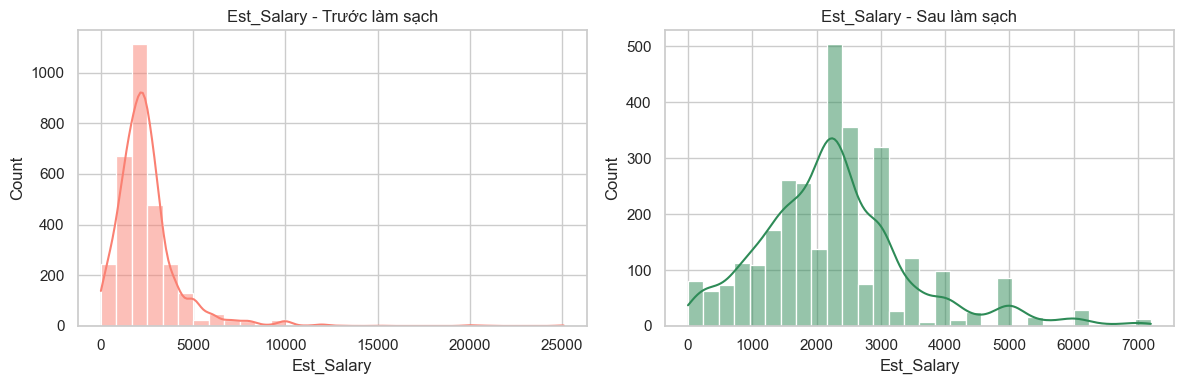

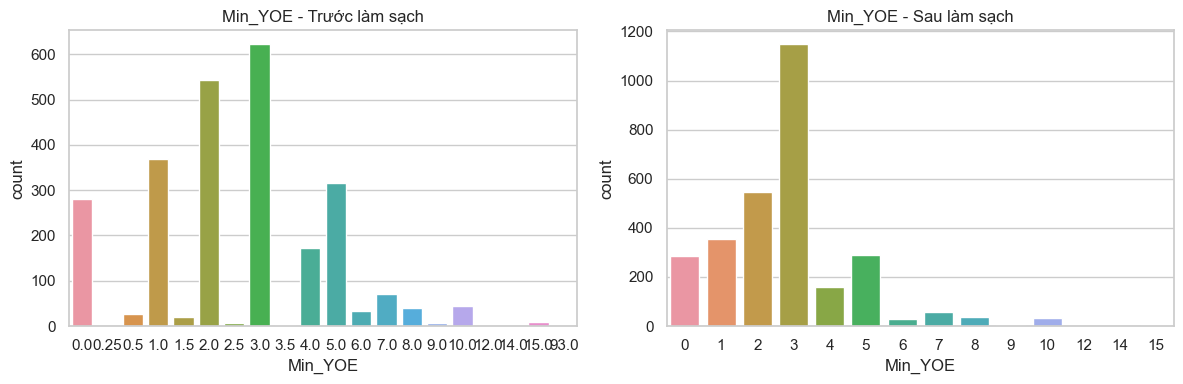

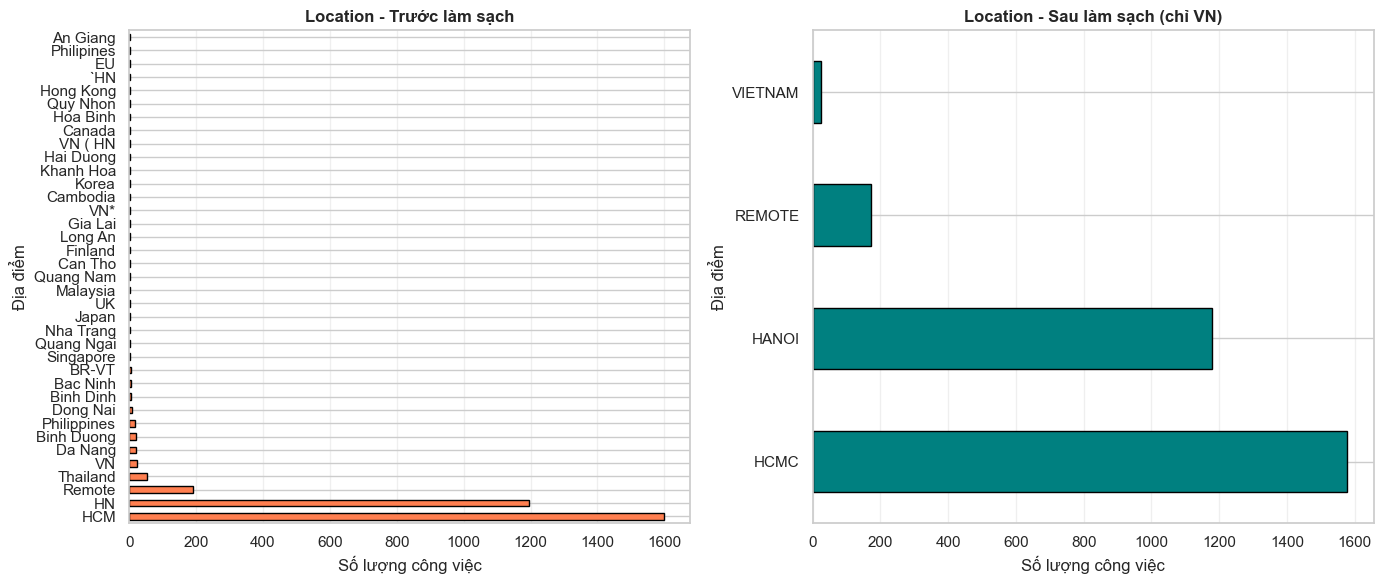

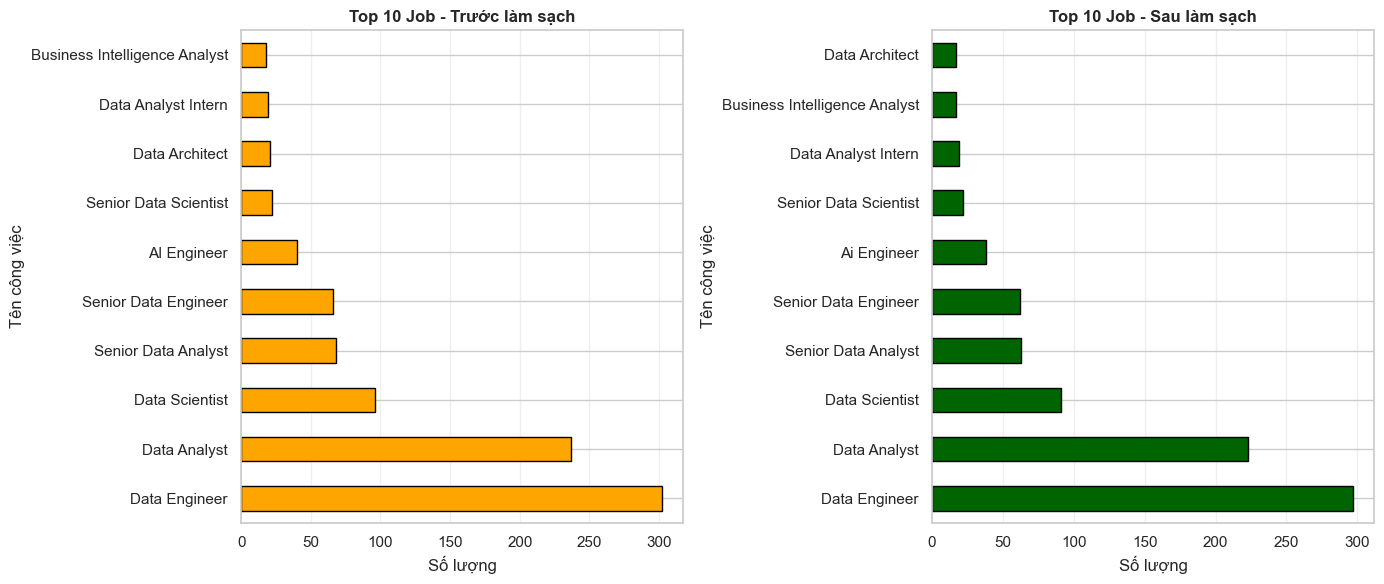

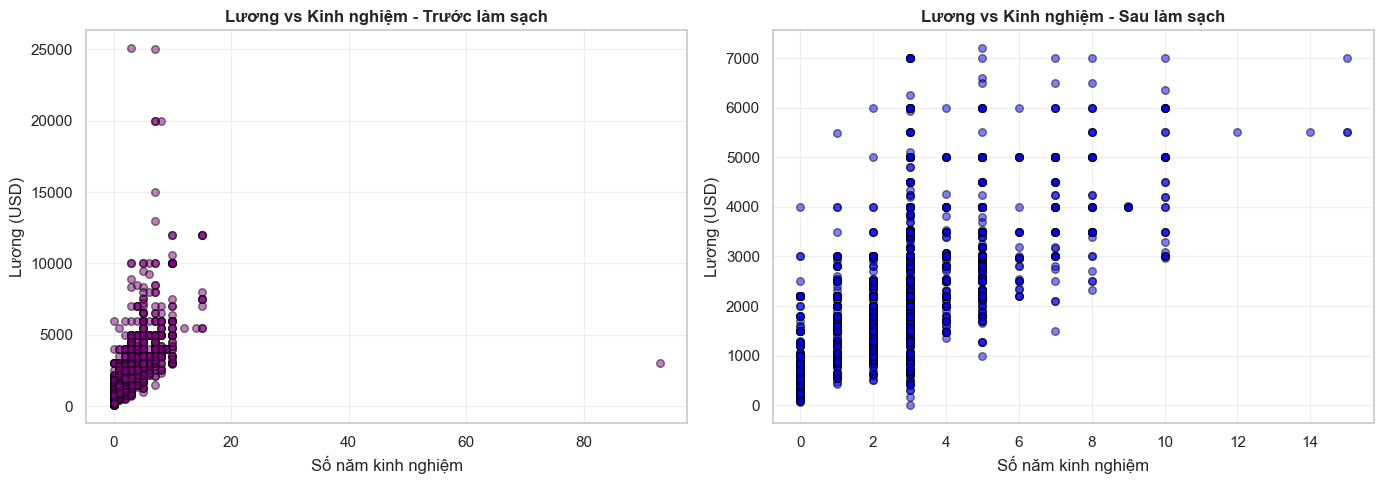


📊 THỐNG KÊ SO SÁNH
Kích thước:        3,187 → 2,953 dòng (loại bỏ 234 dòng)
Lương TB:          $2,491 → $2,273
Kinh nghiệm TB:    2.9 → 2.8 năm
Số địa điểm:       37 → 4
Số loại công việc: 1684 → 1543


In [13]:
# So sánh phân bố trước/sau làm sạch
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(raw_df['Est_Salary'], bins=30, kde=True, ax=axes[0], color='salmon')
axes[0].set_title('Est_Salary - Trước làm sạch')
sns.histplot(df['Est_Salary'], bins=30, kde=True, ax=axes[1], color='seagreen')
axes[1].set_title('Est_Salary - Sau làm sạch')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(x='Min_YOE', data=raw_df, ax=axes[0])
axes[0].set_title('Min_YOE - Trước làm sạch')
sns.countplot(x='Min_YOE', data=df, ax=axes[1])
axes[1].set_title('Min_YOE - Sau làm sạch')
plt.tight_layout()
plt.show()

# So sánh phân bố ĐỊA ĐIỂM
fig, axes = plt.subplots(1, 2, figsize=(14,6))
raw_df['Location'].value_counts().plot(kind='barh', ax=axes[0], color='coral', edgecolor='black')
axes[0].set_title('Location - Trước làm sạch', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Số lượng công việc')
axes[0].set_ylabel('Địa điểm')
axes[0].grid(axis='x', alpha=0.3)

df['Location'].value_counts().plot(kind='barh', ax=axes[1], color='teal', edgecolor='black')
axes[1].set_title('Location - Sau làm sạch (chỉ VN)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Số lượng công việc')
axes[1].set_ylabel('Địa điểm')
axes[1].grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# So sánh TOP 10 CÔNG VIỆC phổ biến
fig, axes = plt.subplots(1, 2, figsize=(14,6))
raw_df['Job_Title'].value_counts().head(10).plot(kind='barh', ax=axes[0], color='orange', edgecolor='black')
axes[0].set_title('Top 10 Job - Trước làm sạch', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Số lượng')
axes[0].set_ylabel('Tên công việc')
axes[0].grid(axis='x', alpha=0.3)

df['Job_Title'].value_counts().head(10).plot(kind='barh', ax=axes[1], color='darkgreen', edgecolor='black')
axes[1].set_title('Top 10 Job - Sau làm sạch', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Số lượng')
axes[1].set_ylabel('Tên công việc')
axes[1].grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# So sánh mối quan hệ LƯƠNG vs KINH NGHIỆM
fig, axes = plt.subplots(1, 2, figsize=(14,5))
axes[0].scatter(raw_df['Min_YOE'], raw_df['Est_Salary'], alpha=0.5, c='purple', edgecolors='black', s=30)
axes[0].set_title('Lương vs Kinh nghiệm - Trước làm sạch', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Số năm kinh nghiệm')
axes[0].set_ylabel('Lương (USD)')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(df['Min_YOE'], df['Est_Salary'], alpha=0.5, c='blue', edgecolors='black', s=30)
axes[1].set_title('Lương vs Kinh nghiệm - Sau làm sạch', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Số năm kinh nghiệm')
axes[1].set_ylabel('Lương (USD)')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Thống kê tổng hợp
print("\n" + "="*70)
print("📊 THỐNG KÊ SO SÁNH")
print("="*70)
print(f"Kích thước:        {raw_df.shape[0]:,} → {df.shape[0]:,} dòng (loại bỏ {raw_df.shape[0] - df.shape[0]:,} dòng)")
print(f"Lương TB:          ${raw_df['Est_Salary'].mean():,.0f} → ${df['Est_Salary'].mean():,.0f}")
print(f"Kinh nghiệm TB:    {raw_df['Min_YOE'].mean():.1f} → {df['Min_YOE'].mean():.1f} năm")
print(f"Số địa điểm:       {raw_df['Location'].nunique()} → {df['Location'].nunique()}")
print(f"Số loại công việc: {raw_df['Job_Title'].nunique()} → {df['Job_Title'].nunique()}")
print("="*70)


In [9]:
# Xuất dữ liệu sạch
(df
 .to_csv(CLEAN_PATH, index=False, encoding='utf-8-sig')
)
print(f"Đã lưu dữ liệu sạch tại: {CLEAN_PATH}")


Đã lưu dữ liệu sạch tại: D:\Truc_quan\Data_Jobs_Clean.csv
